In [1]:
folder = 'results_tuning'
nfolds = 5


#folder = 'results_tuning_RT'
#nfolds = 3


In [2]:
import multiprocessing
# from manage_experiments import find_finished
from multiprocessing import Pool
import pandas as pd
import json as _json

import glob as _glob

from tqdm import tqdm


def find_finished(folder, select_variables):
        """
                finds all tasks that are finished.
                The tasks are assumed to be created with
                create_tasks and computed with
                ranking_correlations.

                folder has form r'res/'
        """
        finished = []
        for filename in tqdm(_glob.glob(folder+'*.results')):
                with open(filename, 'r') as file:
                        results = _json.load(file)
                        if results['done']:
                                criterion = True
                                for var in select_variables:
                                        if not results[var] == select_variables[var]:
                                                criterion = False
                                if criterion:
                                        finished.append(filename)
        return finished


def pandas_df_from_results(fold):
    json_data = []
    finished = find_finished(fold+r"/", {})
    for f in finished:
        with open(f,"r") as file: 
            data = _json.load(file)
        #     data['losses_0'] = None
        #     data['losses_1'] = None
        #     data['losses_2'] = None
            data['fold_truths_0_train'] = None
            data['fold_truths_0_test'] = None
            data['fold_truths_0_val'] = None
            data['fold_truths_1_train'] = None
            data['fold_truths_1_test'] = None
            data['fold_truths_1_val'] = None
            data['fold_truths_2_train'] = None
            data['fold_truths_2_test'] = None
            data['fold_truths_2_val'] = None
            data['fold_preds_0_train'] = None
            data['fold_preds_0_test'] = None
            data['fold_preds_0_val'] = None
            data['fold_preds_1_train'] = None
            data['fold_preds_1_test'] = None
            data['fold_preds_1_val'] = None
            data['fold_preds_2_train'] = None
            data['fold_preds_2_test'] = None
            data['fold_preds_2_val'] = None
            df_norm = pd.json_normalize(data)
            json_data.append(df_norm)
    return pd.concat(json_data, ignore_index = True)


def f(fold):
    df = pandas_df_from_results(fold)
    df.to_csv(fold+".csv",index=False)

In [3]:

if __name__ == '__main__':
    results_folders = [
         folder
        ]
    for fold in results_folders:
        print(fold)
        f(fold)
    # with Pool(1) as p:
        # print(p.map(f,results_folders))

results_tuning


100%|██████████| 37/37 [00:00<00:00, 42.74it/s]


In [4]:
import pandas as pd
df = pd.read_csv(f'{folder}.csv') # 'results_tuning_RT'
df.columns
# df1 = pd.read_csv('res_Embeddings_1.csv')
# df2 = pd.read_csv('res_Embeddings_2.csv')

Index(['model_type', 'hidden_dims', 'df_name', 'epochs', 'learning_rate',
       'weight_decay', 'early_stopping', 'n_splits', 'device', 'batch_size',
       ...
       'Balanced Accuracy Bernoulli_1_train',
       'Balanced Accuracy Bernoulli_2_val',
       'Balanced Accuracy Bernoulli_2_test',
       'Balanced Accuracy Bernoulli_2_train',
       'Balanced Accuracy Bernoulli_3_val',
       'Balanced Accuracy Bernoulli_3_test',
       'Balanced Accuracy Bernoulli_3_train',
       'Balanced Accuracy Bernoulli_4_val',
       'Balanced Accuracy Bernoulli_4_test',
       'Balanced Accuracy Bernoulli_4_train'],
      dtype='object', length=147)

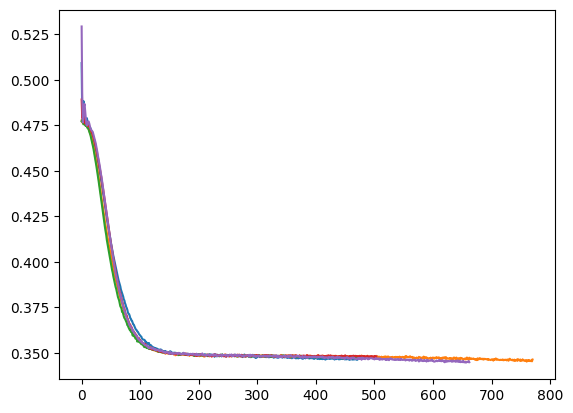

In [5]:
import matplotlib.pyplot as plt

for i in range(nfolds):
    plt.plot(eval(df[[f'losses_{i}']].iloc[0,0]))
plt.show()

In [6]:
df

,model_type,hidden_dims,df_name,epochs,learning_rate,weight_decay,early_stopping,n_splits,device,batch_size,...,Balanced Accuracy Bernoulli_1_train,Balanced Accuracy Bernoulli_2_val,Balanced Accuracy Bernoulli_2_test,Balanced Accuracy Bernoulli_2_train,Balanced Accuracy Bernoulli_3_val,Balanced Accuracy Bernoulli_3_test,Balanced Accuracy Bernoulli_3_train,Balanced Accuracy Bernoulli_4_val,Balanced Accuracy Bernoulli_4_test,Balanced Accuracy Bernoulli_4_train
0,GNN,"[6, 6]",mindsteps_set_full,10000,0.005,0,200,5,cuda:0,32768,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,IRT,5,mindsteps_set_full,10000,0.005,0,200,5,cuda:0,32768,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,IRT,1,mindsteps_set_full,10000,0.005,0,200,5,cuda:0,32768,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,IRT,3,mindsteps_set_full,10000,0.005,0,200,5,cuda:0,32768,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,IRT,1,mindsteps_set_full,10000,0.005,0,200,5,cuda:0,32768,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,IRT,3,mindsteps_set_full,10000,0.005,0,200,5,cuda:0,32768,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,IRT,3,mindsteps_set_full,10000,0.005,0,200,5,cuda:0,32768,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,IRT,5,mindsteps_set_full,10000,0.005,0,200,5,cuda:0,32768,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,GNN,"[8, 8]",mindsteps_set_full,10000,0.005,0,200,5,cuda:0,32768,...,0.657058,0.654177,0.654027,0.655510,0.655062,0.654899,0.661861,0.655059,0.655114,0.657371
9,IRT,1,mindsteps_set_full,10000,0.005,0,200,5,cuda:0,32768,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [7]:
df = df.query("df_name == 'mindsteps_set_full'")
#df = df.query("df_name == 'mindsteps_set_matrix'")
#df = df.query("df_name == 'mindsteps_set_test_matrix'")
# mindsteps_set_matrix
df['Balanced_Accuracy_test'] = (sum([df[f'Balanced Accuracy_{i}_test'] for i in range(nfolds)]))/nfolds
df['Balanced_Accuracy_val'] = (sum([df[f'Balanced Accuracy_{i}_val'] for i in range(nfolds)]))/nfolds
df['Balanced_Accuracy_train'] = (sum([df[f'Balanced Accuracy_{i}_train'] for i in range(nfolds)]))/nfolds

if 'lambda1' in df.columns:
    cols = ['Balanced_Accuracy_test', 'Balanced_Accuracy_val', 'Balanced_Accuracy_train', 'model_type', 
            'hidden_dims', 'decoder_dim', 'batch_norm', 'dropout',  'lambda1', 'lambda2', 'irt_output','weight_decay', 'epochs', 
            'df_name',  'learning_rate', 'early_stopping', 'batch_size'] #, 
else:
    cols = ['Balanced_Accuracy_test', 'Balanced_Accuracy_val', 'Balanced_Accuracy_train', 'model_type', 
            'hidden_dims', 'decoder_dim', 'batch_norm', 'dropout',  'irt_output','weight_decay', 'epochs', 
            'df_name',  'learning_rate', 'early_stopping', 'batch_size'] #, 
print(df.shape)
pd.set_option('display.max_columns', None) 
pd.set_option('display.max_rows', None)

df[cols].sort_values('Balanced_Accuracy_val', ascending=False)

(30, 150)


,Balanced_Accuracy_test,Balanced_Accuracy_val,Balanced_Accuracy_train,model_type,hidden_dims,decoder_dim,batch_norm,dropout,lambda1,lambda2,irt_output,weight_decay,epochs,df_name,learning_rate,early_stopping,batch_size
23,0.738274,0.738381,0.748363,IRT,3,NaN,NaN,NaN,0.000000,0.000000,NaN,0,10000,mindsteps_set_full,0.005,200,32768
27,0.737504,0.737563,0.741794,IRT,1,NaN,NaN,NaN,0.000000,0.000000,NaN,0,10000,mindsteps_set_full,0.005,200,32768
25,0.737343,0.737360,0.745804,GNN,"[12, 12]",12.0,False,0.0,NaN,NaN,False,0,10000,mindsteps_set_full,0.005,200,32768
18,0.737074,0.737228,0.747003,GNN,"[16, 16]",16.0,False,0.0,NaN,NaN,False,0,10000,mindsteps_set_full,0.005,200,32768
17,0.737064,0.737157,0.742640,GNN,"[7, 7]",10.0,False,0.0,NaN,NaN,False,0,10000,mindsteps_set_full,0.005,200,32768
20,0.737001,0.737109,0.742219,GNN,"[5, 5]",12.0,False,0.0,NaN,NaN,False,0,10000,mindsteps_set_full,0.005,200,32768
13,0.736996,0.737059,0.741598,GNN,"[5, 5]",8.0,False,0.0,NaN,NaN,False,0,10000,mindsteps_set_full,0.005,200,32768
26,0.736918,0.736939,0.740744,GNN,"[5, 5]",8.0,False,0.0,NaN,NaN,False,0,10000,mindsteps_set_full,0.005,200,32768
12,0.736777,0.736918,0.752295,IRT,5,NaN,NaN,NaN,0.000000,0.000000,NaN,0,10000,mindsteps_set_full,0.005,200,32768
22,0.736852,0.736917,0.740845,GNN,"[6, 6]",6.0,False,0.0,NaN,NaN,False,0,10000,mindsteps_set_full,0.005,200,32768


<Axes: xlabel='decoder_dim', ylabel='Balanced_Accuracy_test'>

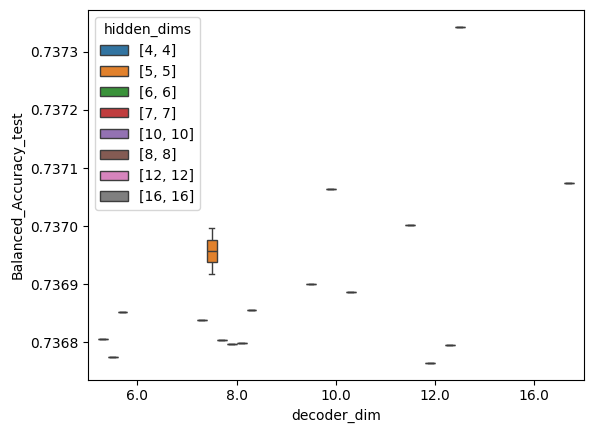

In [8]:
import seaborn as sns
dff = df.query("model_type == 'GNN' & dropout == 0 & batch_norm == False")
sns.boxplot(data=dff, x="decoder_dim", y="Balanced_Accuracy_test", hue="hidden_dims")